7)	Using Housing dataset, define a non-linear regression by building linear regression, extract residual plot from linear regression, then apply transformation, fit the model and build residual plot for transformed and fitting the same with polynomial regression and compare the results. The targeted features should be median income and median_house_value. Before building the linear regression, extract and select the feature, do preprocessing and drop the unwanted features.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [6]:
#List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
# Defining the map function
def binary_map(x):
 return x.map({'yes': 1, "no": 0})
# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [7]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable
status = pd.get_dummies(df['furnishingstatus'])

In [8]:
# Check what the dataset 'status' looks like
status.head()

""
0
1
2
3
4


In [9]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [10]:
df = pd.concat([df, status], axis = 1)

In [11]:
# Drop 'furnishingstatus' as we have created the dummies for it
df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [12]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respective
np.random.seed(0)
x_train, x_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 10)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [16]:
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])

In [17]:
x_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
175,0.303030,0.582734,0.6,0.5,0.333333,1,1,0,0,0,0.666667,0
25,0.587879,0.348201,0.6,0.5,0.333333,1,1,1,0,1,0.666667,1
253,0.239394,0.130935,0.2,0.0,0.333333,1,0,0,0,0,0.000000,1
257,0.236364,0.471223,0.4,0.0,0.000000,1,0,0,0,0,0.000000,0
431,0.133333,0.106475,0.6,0.0,0.333333,1,0,1,0,1,0.000000,0


In [18]:
x_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.264227,0.242041,0.396850,0.150919,0.273841,0.868766,0.167979,0.338583,0.065617,0.309711,0.216973,0.217848
std,0.167572,0.147100,0.150055,0.251690,0.291128,0.338100,0.374339,0.473850,0.247937,0.462983,0.278137,0.413326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.136691,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.227273,0.201439,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.357576,0.326619,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
y_train = x_train.pop('price')
X_train = x_train

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
lm.score(X_train, y_train)

0.6479869225386118

In [23]:
lm.intercept_

-0.012306231150636282

In [24]:
pip install yellowbrick

**ResidualsPlot**

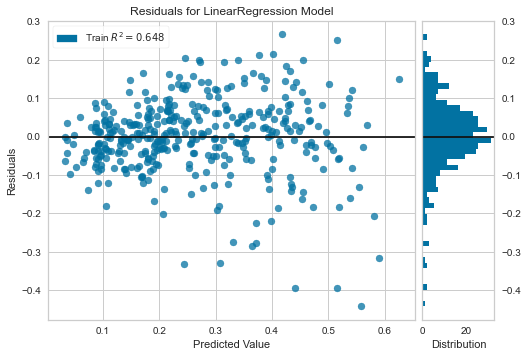

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [25]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
# Instantiate and fit the visualizer
model = LinearRegression()
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X_train, y_train)
visualizer_residuals.show()

**featuring scaling**

In [26]:
X=x_train.iloc[:,1:2].values
y=x_train.iloc[:,2].values

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

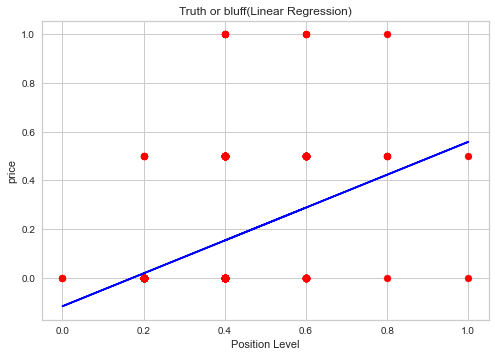

In [29]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Truth or bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('price')
plt.show()

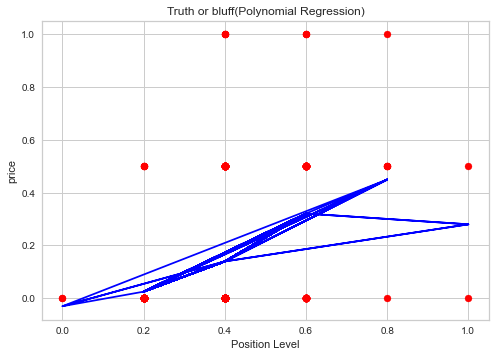

In [30]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Truth or bluff(Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('price')
plt.show()